# Introduction to Reinforcement Learning (RL)

## What is Reinforcement Learning?

**Reinforcement Learning (RL)** is a computational approach where an **agent** learns to make decisions by **interacting** with an **environment**, receiving feedback in the form of **rewards**.

**Key terms:**
- **Agent:** the learner or decision maker.
- **Environment:** the world that provides observations and rewards.
- **State (s):** a representation of the environment at a given time.
- **Action (a):** what the agent can do.
- **Reward (r):** a scalar feedback signal.
- **Policy (π):** defines how the agent selects actions.
- **Value Function (V, Q):** measures expected future rewards.
- **Model:** represents environment dynamics \(P(s'|s,a)\).

## Setup

In [4]:
!pip install "gymnasium[classic-control]" numpy matplotlib stable-baselines3 torch procgen pybullet ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 951.1/951.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 11.6 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 11.3 MB/s eta 0:00:001m12.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 11.9 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 11.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB

## The RL Cycle (CartPole Game)
The CartPole game is a gem with the goal of balancing a pendulum acting on a horizontal cart. A reward of +1 is provided for every timestep when the pendulum is in the upright position. The episode ends when it is too unbalanced or it manages to balance itself for more than 200 timesteps.

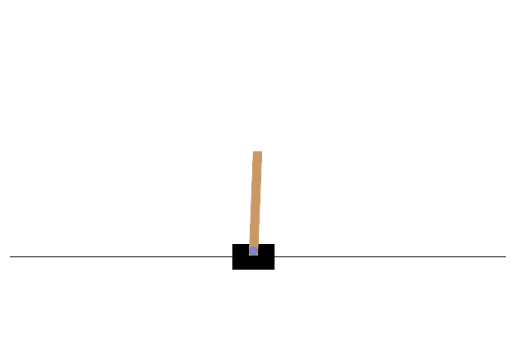

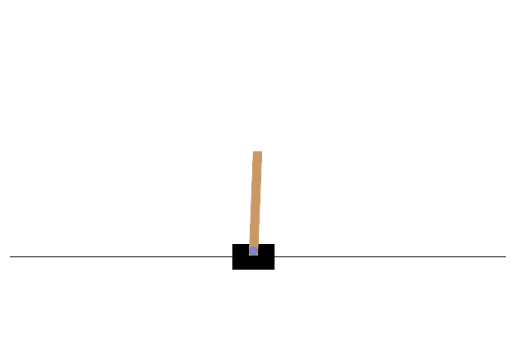

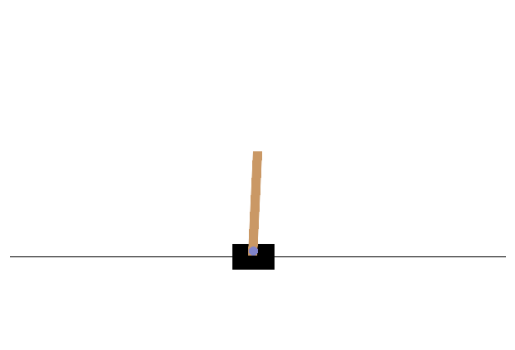

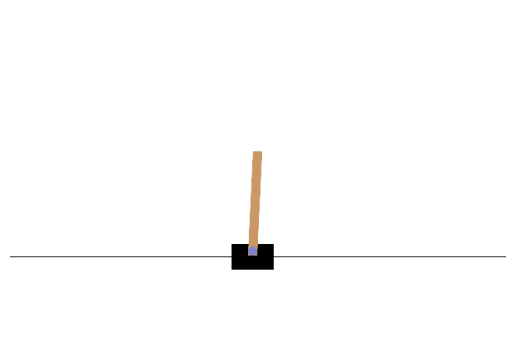

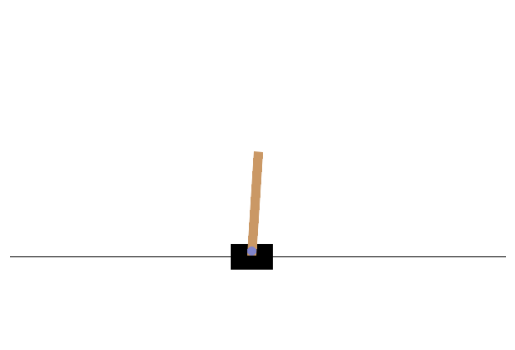

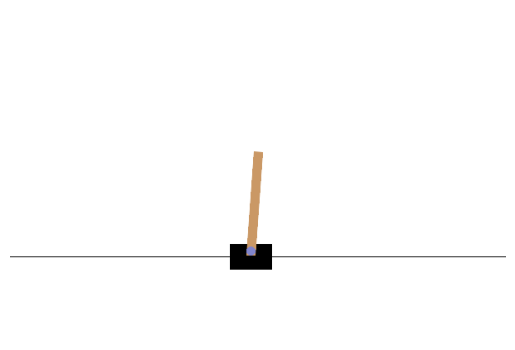

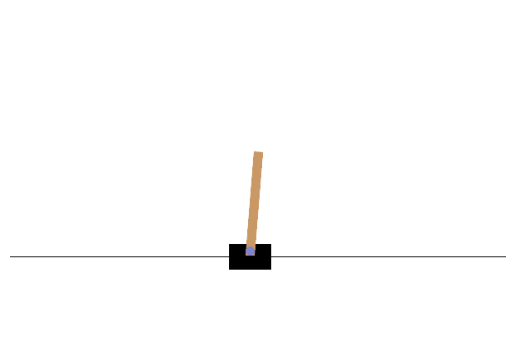

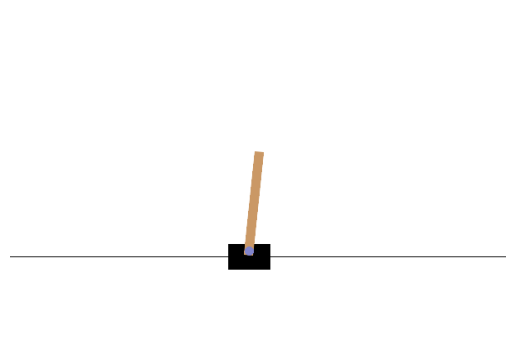

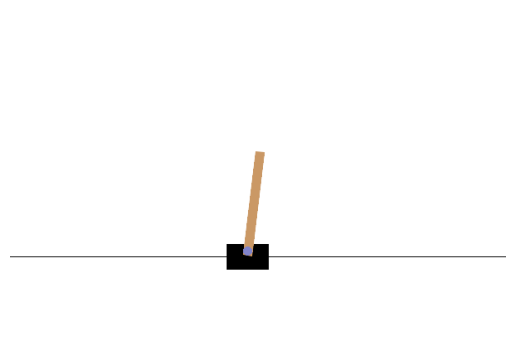

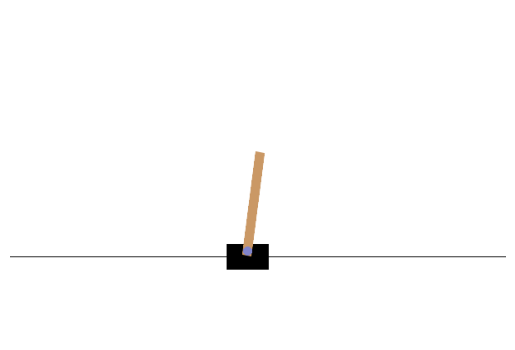

In [26]:
import gymnasium as gym
import matplotlib.pyplot as plt

# create the environment 
env = gym.make("CartPole-v1", render_mode="rgb_array")
# reset the environment before starting
obs, info = env.reset()

frames = []

# loop 10 times
for i in range(10):
    # take a random action
    env.step(env.action_space.sample())
    # render the game
    frame = env.render() 
    frames.append(frame)

# close the environment
env.close()

# display game frames
for frame in frames:
    plt.imshow(frame)
    plt.axis('off')
    plt.show()


![CartPole example](images/cartpole.png)

In [27]:

import gym

# create and initialize the environment
env = gym.make("CartPole-v1")
env.reset()

# play 10 games
for i in range(10):
    # initialize the variables
    done = False
    game_rew = 0

    while not done:
        # choose a random action
        action = env.action_space.sample()
        # take a step in the environment
        new_obs, rew, terminated, truncated, info = env.step(action)
        game_rew += rew
        done = terminated or truncated
    
        # when is done, print the cumulative reward of the game and reset the environment
        if done:
            print('Episode %d finished, reward:%d' % (i, game_rew))
            env.reset()

Episode 0 finished, reward:14
Episode 1 finished, reward:20
Episode 2 finished, reward:19
Episode 3 finished, reward:32
Episode 4 finished, reward:20
Episode 5 finished, reward:26
Episode 6 finished, reward:28
Episode 7 finished, reward:9
Episode 8 finished, reward:21
Episode 9 finished, reward:26


/home/horte/miniconda3/envs/rl_course/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## Open Source Environments
There are many open source environments that are built to tackle specific problems.

- [CoinRun](https://github.com/openai/coinrun).
- [Gymnasium](https://gymnasium.farama.org/).
    Environments: [Classic control](https://gymnasium.farama.org/environments/classic_control/), [Box2D](https://gymnasium.farama.org/environments/box2d/), [Toy Text](https://gymnasium.farama.org/environments/toy_text/), [MuJoCo](https://gymnasium.farama.org/environments/mujoco/), [Atari](https://ale.farama.org/environments/)
- [Duckietown](https://github.com/duckietown/gym-duckietown).
- [DeepMindLab](https://github.com/google-deepmind/lab).